In [1]:
import geopandas as gps
import pandas as pd
import shapely
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
%matplotlib inline

hospital_scalar=1.0#use this to weight how important hospitals are

In [2]:
hospitals = pd.read_csv("Hospital_locations/data-hospitallocations.csv")
hospital_points = []
for i, row in hospitals.iterrows():
    hospital_points.append(Point(row['X'], row['Y']))

In [3]:
neighborhoods = gps.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhood_score={}

In [4]:
for i in neighborhoods['objectid']:
    neighborhood_score[i]=0.0

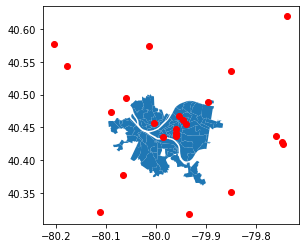

In [5]:
neighborhoods = gps.read_file("Neighborhoods/Neighborhoods_.shp")
hospital_map = gps.read_file("Hospital_locations/data-hospitallocations-point.shp")
ax = hospital_map.plot(zorder=2, color="red")
neighborhoods.plot(ax=ax, zorder=1)
plt.show()

In [6]:
count=0
for i in neighborhoods['geometry']:    
    for j in hospital_points:
        if(i.contains(j)):
            neighborhood_score[count]+=(1*hospital_scalar)
    count+=1

In [9]:
def find_best_neighborhood():
    max_score=0.0
    max_ind=0
    for k,v in neighborhood_score.items():
        if(v>max_score):
            max_ind=k
            max_score=v
    best_list=[]
    for k,v in neighborhood_score.items():
        if(v==max_score):
            best_list.append((neighborhoods['hood'][k], max_score))
    return best_list
print(find_best_neighborhood())

[('North Oakland', 1.0), ('West Oakland', 1.0), ('Central Lawrenceville', 1.0), ('Bluff', 1.0), ('Lincoln-Lemington-Belmar', 1.0), ('South Oakland', 1.0), ('Central Northside', 1.0), ('Bloomfield', 1.0), ('Shadyside', 1.0)]
